<a href="https://colab.research.google.com/github/Dinesh-Kumar-Verma/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients, information. It includes over 4,000 records and 15 attributes.
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [207]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import chi2

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# # Load Dataset
# df = pd.read_csv("data_cardiovascular_risk (1).csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [208]:
df= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Data_Sets/data_cardiovascular_risk.csv")

### Dataset First View

In [60]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [129]:
#df.tail()

### Dataset Rows & Columns count

In [209]:
# Dataset Rows & Columns count
print(f"Tha dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Tha dataset has 3390 rows and 17 columns


### Dataset Information

In [210]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [211]:
# Dataset Duplicate Value Count
print(f" The dataset has {df.duplicated().sum()} duplicate values")

 The dataset has 0 duplicate values


#### Missing Values/Null Values

In [212]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

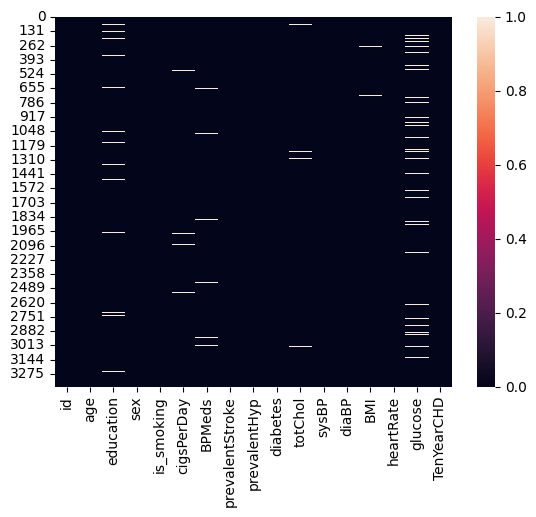

In [213]:
# Visualizing the missing values
#plt.figure(figsize = (10,6))
sns.heatmap(df.isnull())

### What did you know about your dataset?

Tha dataset has 3390 rows and 17 columns, in which TenYearCHD column is the target feature.

There are no duplicate values.

There are 87 missing values in education feature, 22 in cigsPerDay, 44 in BPMeds, 38 in totChol, 14 in BMI and 204 in glucose feature.



## ***2. Understanding Your Variables***

In [214]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [215]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [216]:
# Check Unique Values for each variable.
for  variable in df.columns.tolist():
  print("No. of unique values in", variable, "is -",df[variable].nunique())

No. of unique values in id is - 3390
No. of unique values in age is - 39
No. of unique values in education is - 4
No. of unique values in sex is - 2
No. of unique values in is_smoking is - 2
No. of unique values in cigsPerDay is - 32
No. of unique values in BPMeds is - 2
No. of unique values in prevalentStroke is - 2
No. of unique values in prevalentHyp is - 2
No. of unique values in diabetes is - 2
No. of unique values in totChol is - 240
No. of unique values in sysBP is - 226
No. of unique values in diaBP is - 142
No. of unique values in BMI is - 1259
No. of unique values in heartRate is - 68
No. of unique values in glucose is - 132
No. of unique values in TenYearCHD is - 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [217]:
# Before doing any data wrangling creating a duplicate of the dataset
df_w = df.copy()

In [218]:
# Renaming the columns
df_w.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [219]:
df_w.drop("id", axis = 1, inplace = True)

In [220]:
# convert categorical float values to int
df_w['education'] = df_w['education'].astype('Int64')
df_w['bp_meds'] = df_w['bp_meds'].astype('Int64')


In [221]:
# defining dependent feature, categorical feature and continuous feature
dependent_feature = df_w['ten_year_chd']
discrete_feature = [feature for feature in df_w.columns if df_w[feature].nunique()<=4]
continuous_feature = [ feature for feature in df_w.columns if feature not in discrete_feature]


In [222]:
print("discrete_feature = ", discrete_feature)
print("continuous_feature = ", continuous_feature)

discrete_feature =  ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']
continuous_feature =  ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


In [223]:
df = df_w.copy()

### What all manipulations have you done and insights you found?

I have renamed the columns, changed the type of discrete feature education and dp_meds from float to int  and classified the data as a dependent feature, discrete and continuous feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Ten Year CHD (%)

ten_year_chd
0    2879
1     511
Name: count, dtype: int64
 


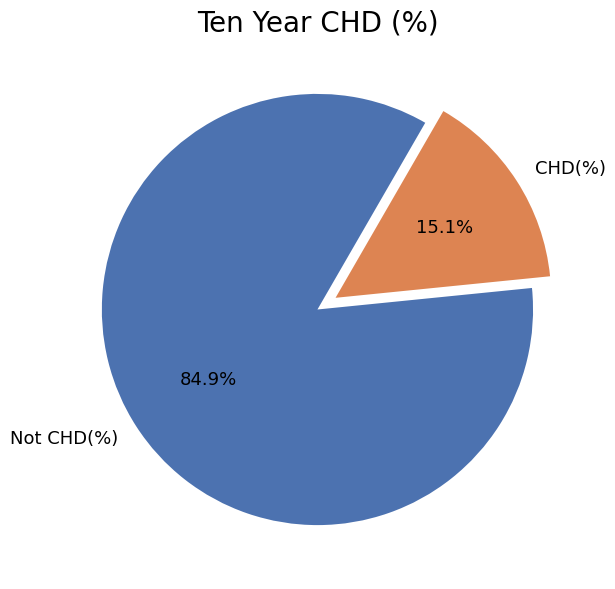

In [224]:
# Chart - 1 visualization code
# Distribution of dependent varaible - ten_year_chd


# Dependant Column Value Counts
print(df.ten_year_chd.value_counts())
print(" ")

#color palette selection
colors = sns.color_palette("deep")


# plotting data on chart
plt.figure(figsize=(12,7))
explode = [0,0.1]
textprops = {'fontsize':13}
plt.pie(df['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=60, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=20)

# displaying chart
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a good choice to visualize the distribution of a binary categorical variable like 'TenYearCHD' as it clearly shows the proportion of each category within the whole dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the dataset is imbalanced, with a much larger proportion of patients not having a 10-year risk of CHD (84.9%) compared to those who do (15.1%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is crucial for model building. Recognizing the class imbalance means that accuracy alone might not be a good evaluation metric. We will need to consider other metrics like precision, recall, and F1-score, and potentially use techniques like oversampling or undersampling to handle the imbalance for better model performance. This will lead to a more reliable model for predicting CHD risk, which has positive business impact in healthcare by better identifying at-risk individuals.

#### Chart - 2: Countplots of Discrete Features

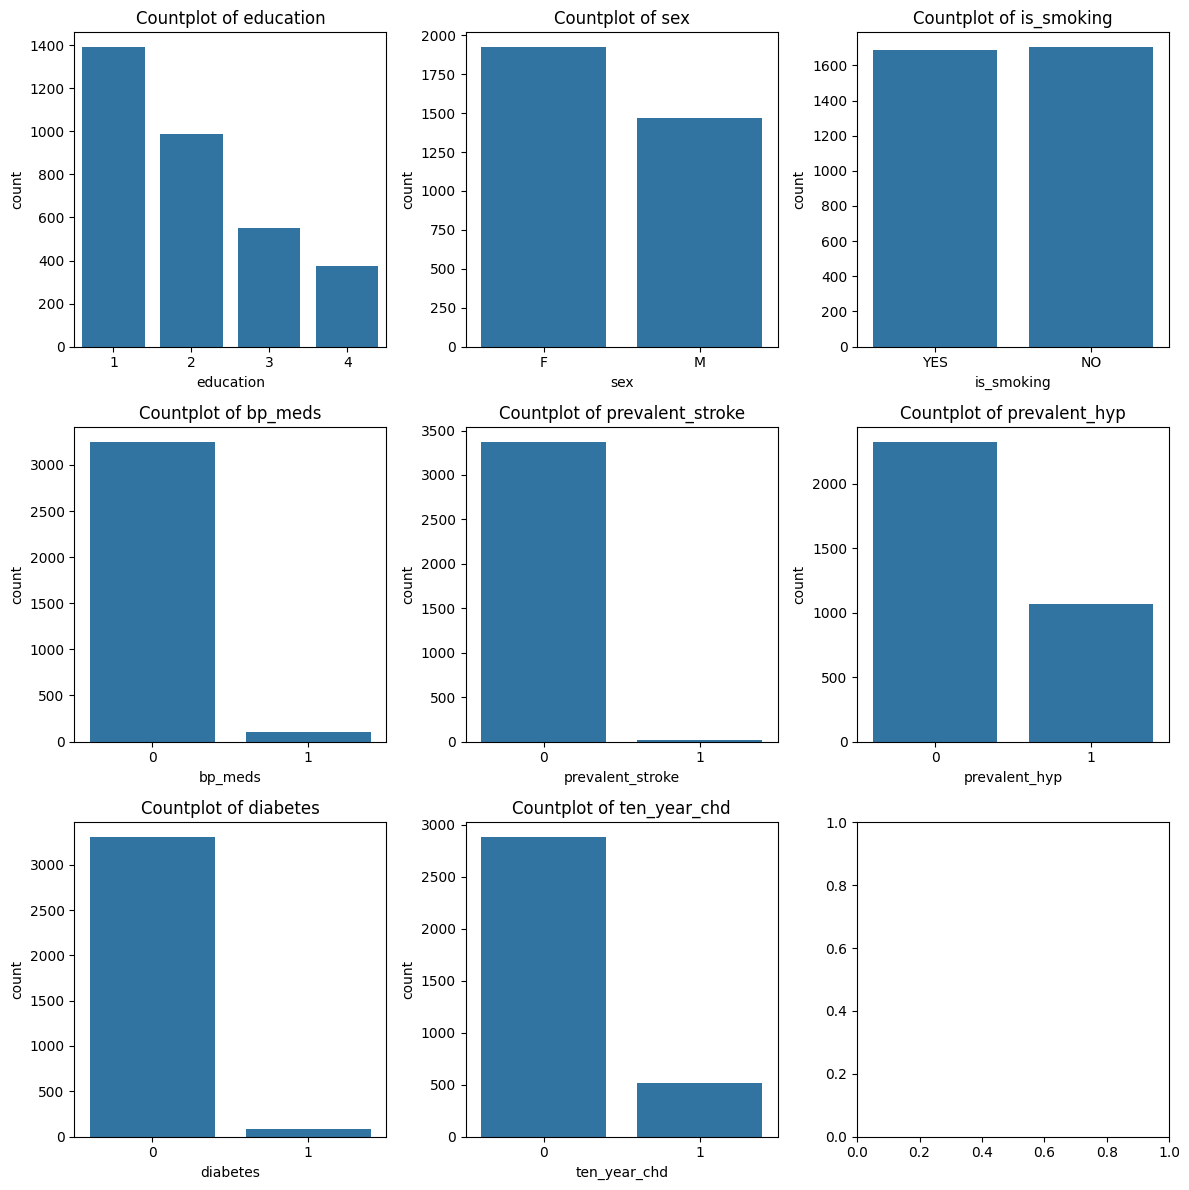

In [225]:
# Chart - 2 visualization code
# Calculate the number of rows needed for the subplot grid
num_rows = (len(discrete_feature) + 1) // 3  # Adding 1 to round up if there's an odd number of features
# Create the subplot grid
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()
# Loop through the categorical features and plot countplots
for i, feature in enumerate(discrete_feature):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot of {feature}")

# Hide any unused subplots if there are an odd number of features
if len(discrete_feature) % 2 == 1:
    axes[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Countplots are suitable for visualizing the frequency distribution of categorical variables. By plotting all discrete features, we can quickly understand the distribution of each category within those features.

##### 2. What is/are the insight(s) found from the chart?

* education: Most patients have an education level of 1 or 2.
* sex: There are slightly more female patients than male patients.
* is_smoking: There are more non-smokers than smokers.
* bp_meds, prevalent_stroke, prevalent_hyp, diabetes: The majority of patients in the dataset do not have these conditions. This indicates that these are relatively rare occurrences in this dataset.
* ten_year_chd: This reiterates the imbalance seen in the pie chart, showing significantly more patients without a 10-year risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of these discrete features helps in understanding the characteristics of the patient population in the dataset. For features with very few positive cases (like bp_meds, prevalent_stroke, diabetes), this might indicate that these are strong risk factors when they are present, or it might suggest challenges in building a model that accurately predicts CHD based on these rare conditions alone. This knowledge helps in deciding on appropriate data preprocessing and modeling strategies.

#### Chart - 3: Distribution and Box Plots of Continuous Features

In [226]:
# Chart - 3 visualization code
def plot_distribution_and_boxplot():
  # Create a grid of subplots
  rows = len(continuous_feature)
  fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
  plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

  # Plot distribution plot and box plot for each numerical feature
  for i, feature in enumerate(continuous_feature):
    # KDE plot
    sns.kdeplot(df[feature], ax=axes[i, 0], fill = True)
    axes[i, 0].set_title(f'{feature} Distribution')

    # Calculate mean, median, and mode
    mean_val = np.mean(df[feature])
    median_val = np.median(df[feature])
    mode_val = df[feature].mode().values[0]

    # Add vertical lines for mean, median, and mode on the KDE plot
    axes[i, 0].axvline(x=mean_val, color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(x=median_val, color='green', linestyle='--', label='Median')
    axes[i, 0].axvline(x=mode_val, color='blue', linestyle='--', label='Mode')

    axes[i, 0].legend()

    # Box plot
    sns.boxplot(x=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Box Plot')

  plt.tight_layout()  # Adjust spacing between subplots automatically
  return plt.show()




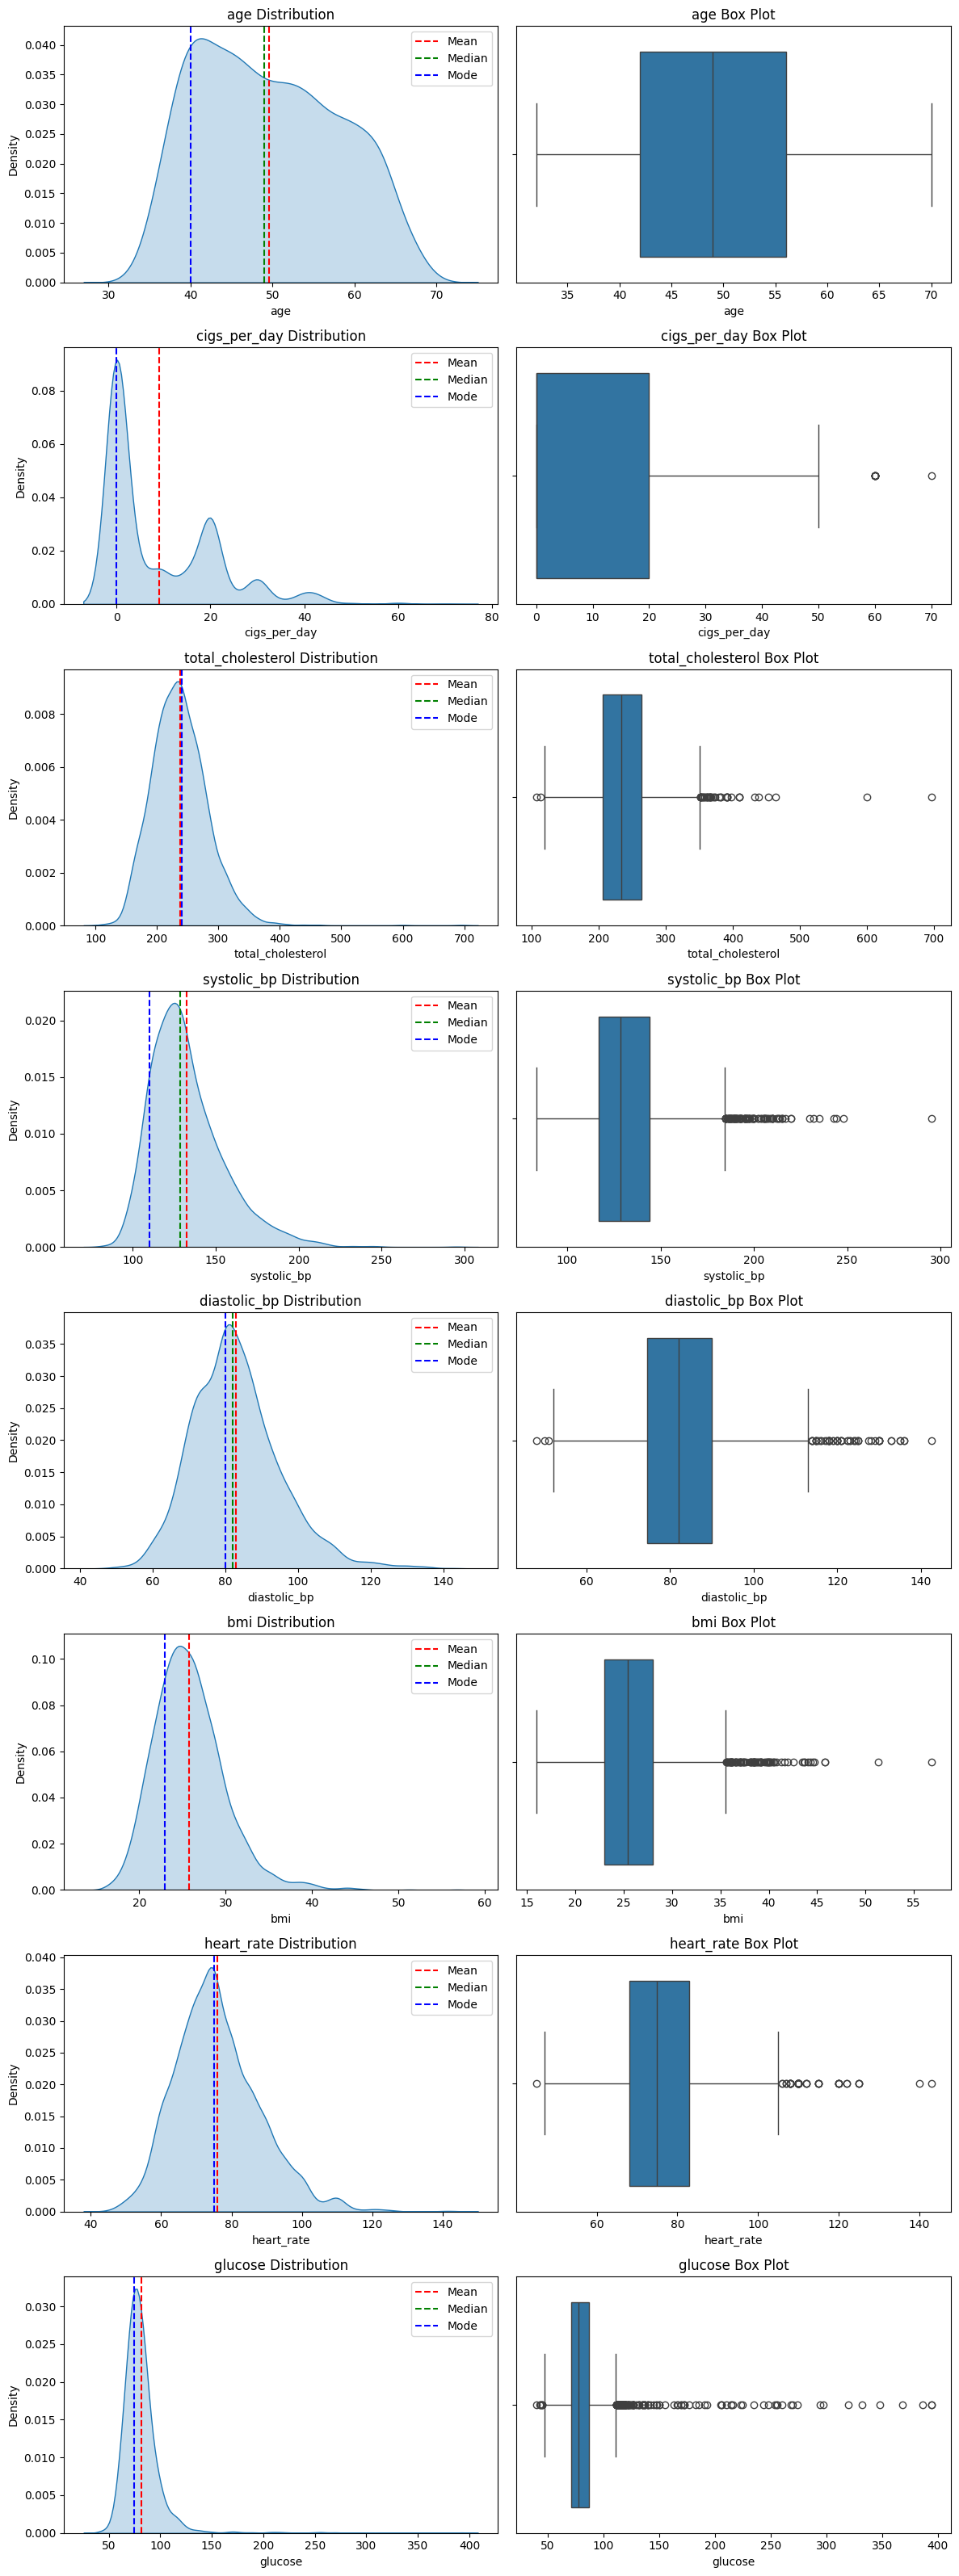

In [227]:
plot_distribution_and_boxplot()

##### 1. Why did you pick the specific chart?

KDE plots (Distribution plots) help visualize the probability density of continuous variables, showing their shape and spread. Box plots provide a summary of the distribution, including quartiles, median, and potential outliers. Combining both gives a comprehensive view of the distribution and presence of outliers in continuous features. Adding mean, median, and mode lines to the KDE plot helps to quickly assess the skewness of the distribution.

##### 2. What is/are the insight(s) found from the chart?

* age: The age distribution appears somewhat normal, with a peak around the late 40s to early 50s. The box plot shows the spread of ages and no significant outliers.
* cigs_per_day: This distribution is heavily skewed towards 0, indicating many non-smokers or light smokers. The box plot shows a large number of outliers with high numbers of cigarettes per day.
* total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose: These features show varying degrees of skewness and presence of outliers as indicated by the KDE and box plots. The outliers in these medical measurements might represent individuals with significantly high or low values, which could be important indicators of health risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the distribution and outliers in continuous features is important for data preprocessing. Skewed distributions might require transformation (e.g., log transformation) to meet the assumptions of certain models. Outliers might need to be handled (e.g., removal, capping, or transformation) depending on their nature and potential impact on the model. Addressing these issues can lead to a more robust and accurate model for predicting CHD risk, which is beneficial for identifying individuals who need intervention.

#### Chart - 4:% of patients at the risk of CHD by Discrete Features

<Figure size 1000x500 with 0 Axes>

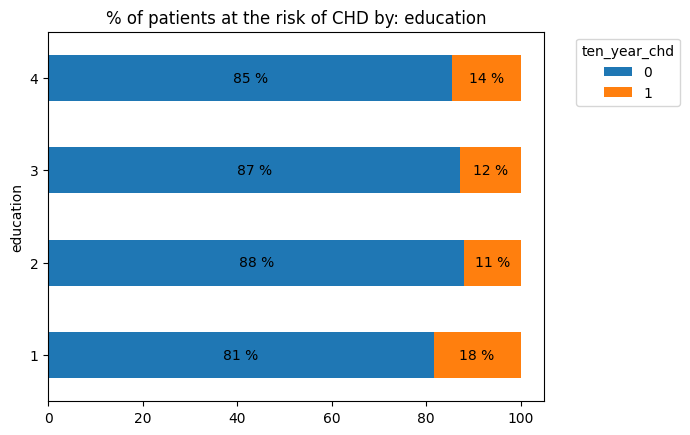

<Figure size 1000x500 with 0 Axes>

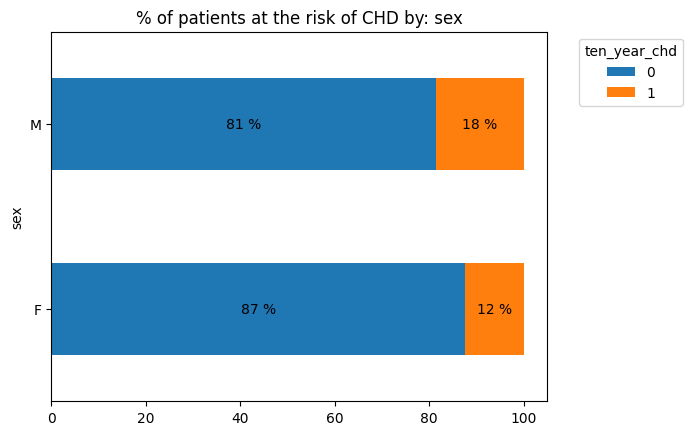

<Figure size 1000x500 with 0 Axes>

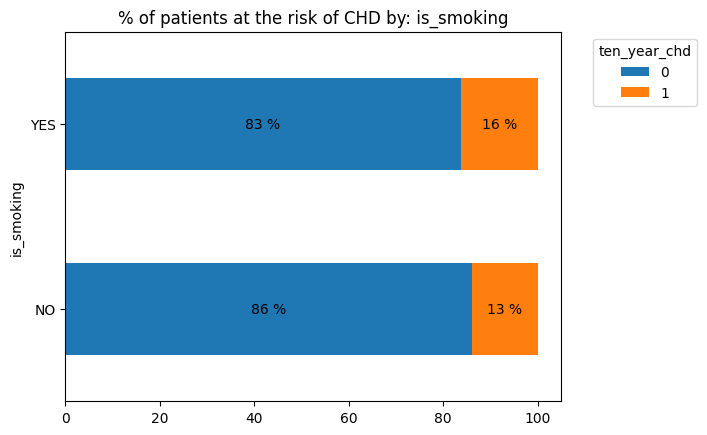

<Figure size 1000x500 with 0 Axes>

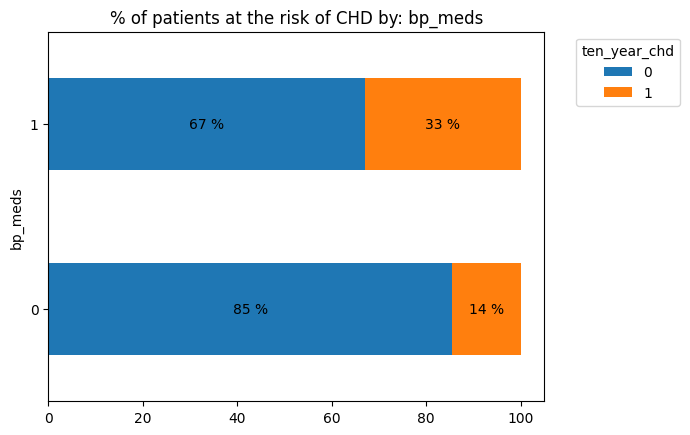

<Figure size 1000x500 with 0 Axes>

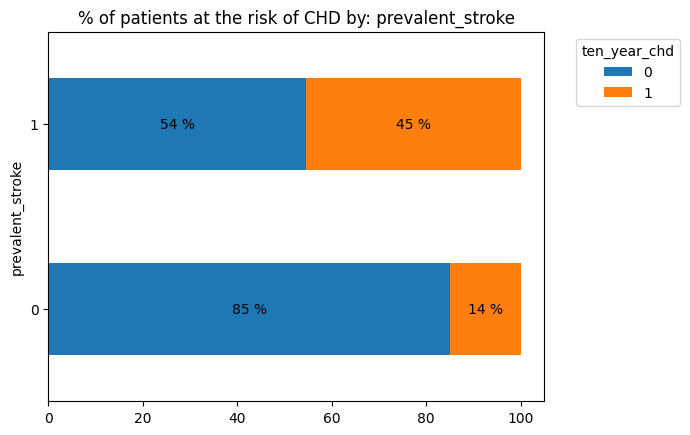

<Figure size 1000x500 with 0 Axes>

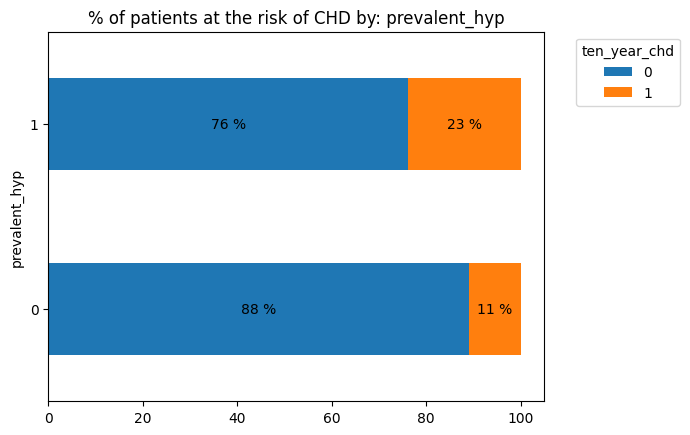

<Figure size 1000x500 with 0 Axes>

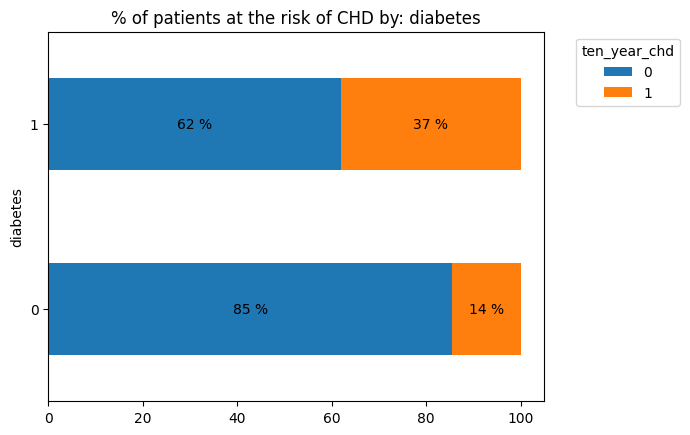

In [228]:
# Chart - 4 visualization code

# Iterate over each discrete feature except the last one
for i in discrete_feature[:-1]:
    # Define x and y variables for plotting
    x_var, y_var = i, 'ten_year_chd'

    # Create a figure for the plot
    plt.figure(figsize=(10, 5))

    # Group the data by the x variable and calculate the percentage of each y variable category
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var) * 100

    # Plot a horizontal stacked bar chart
    df_grouped.plot.barh(stacked=True)

    # Place legend outside the plot area
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=y_var)

    # Set title for the plot
    plt.title("% of patients at the risk of CHD by: " + i)

    # Add percentage labels to the bars
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:  # Display label only if the percentage is greater than 0.1%
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

    # Show the plot
    plt.show()


##### 1. Why did you pick the specific chart?

 Stacked horizontal bar charts are effective for comparing the proportion of a binary outcome (TenYearCHD) across different categories of discrete variables. They clearly show the percentage of patients with and without CHD risk within each category.

##### 2. What is/are the insight(s) found from the chart?

* education: The risk of CHD appears to be slightly higher for individuals with lower education levels (18% for level 1) compared to those with higher education levels (11% for level 2, 12% for level 3, and 14% for level 4).
* sex: Male patients have a higher risk of CHD (18%) compared to female patients (12%).
is_smoking: Smokers have a slightly higher risk of CHD (16%) compared to non-smokers (13%).
* bp_meds: Patients on blood pressure medication have a significantly higher risk of CHD (33%) compared to those not on medication (14%). This is an expected and important insight.
* prevalent_stroke: Patients who have had a prevalent stroke have a much higher risk of CHD (45%) compared to those who haven't (14%). This is a strong indicator.
* prevalent_hyp: Hypertensive patients have a higher risk of CHD (23%) compared to those who are not (11%).
* diabetes: Diabetic patients have a considerably higher risk of CHD (37%) compared to non-diabetic patients (14%). This is another strong indicator.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These charts provide valuable insights into which discrete factors are associated with a higher risk of CHD. This information is directly applicable to building a predictive model and can inform targeted interventions and preventative measures in healthcare. For example, focusing on patients with prevalent stroke, diabetes, or those on BP medication might be particularly important for risk assessment and management.

#### Chart - 5

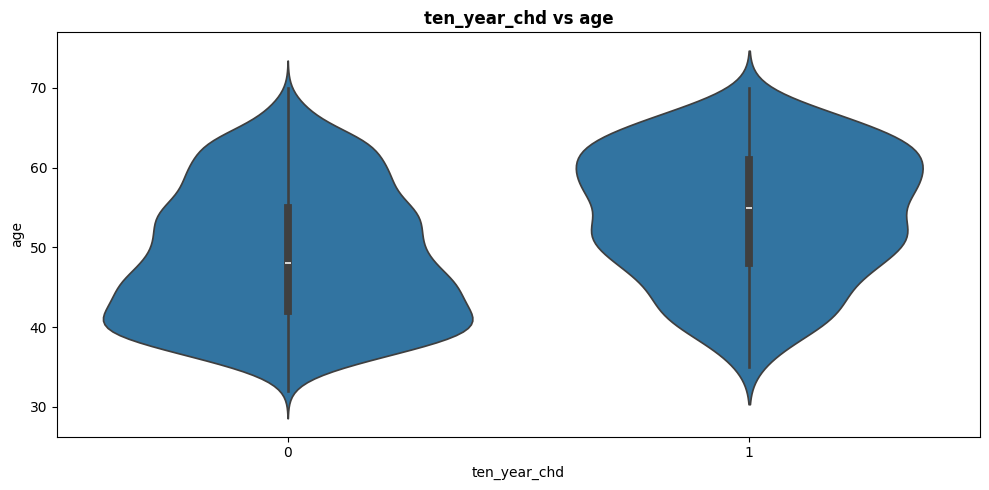

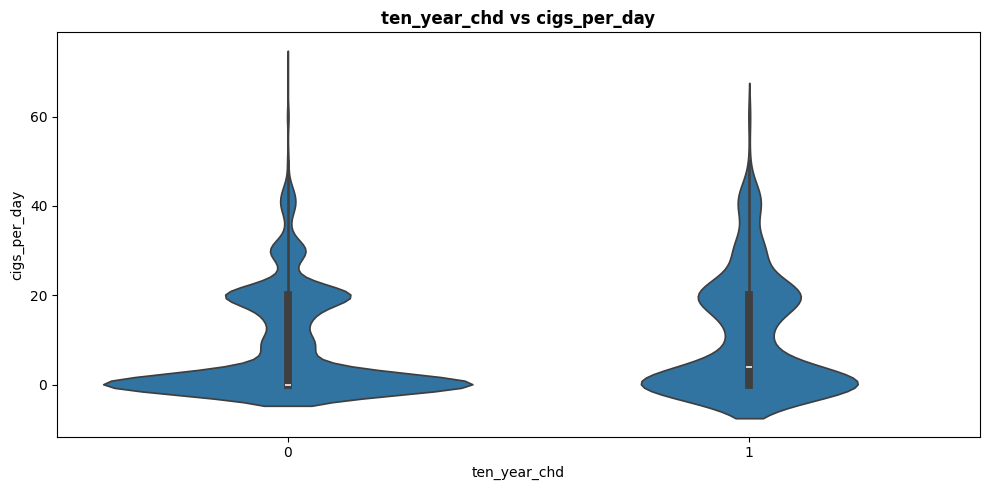

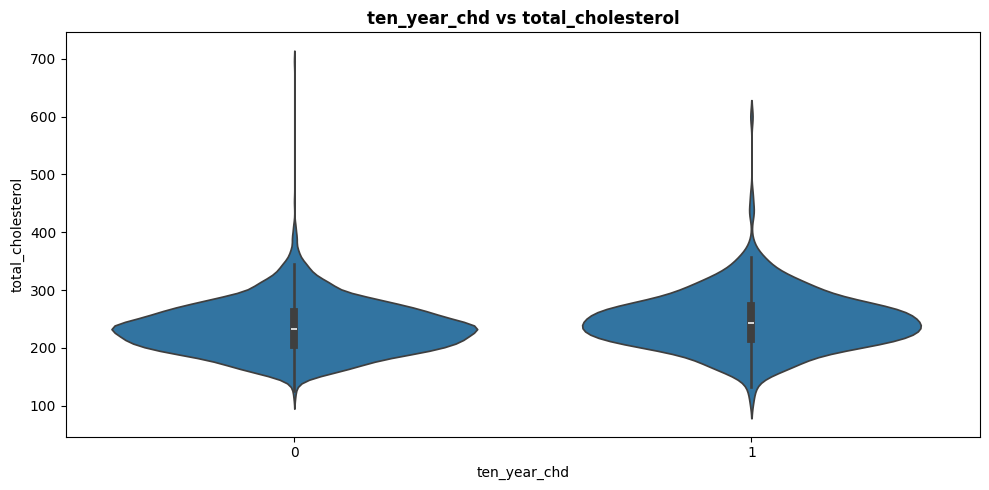

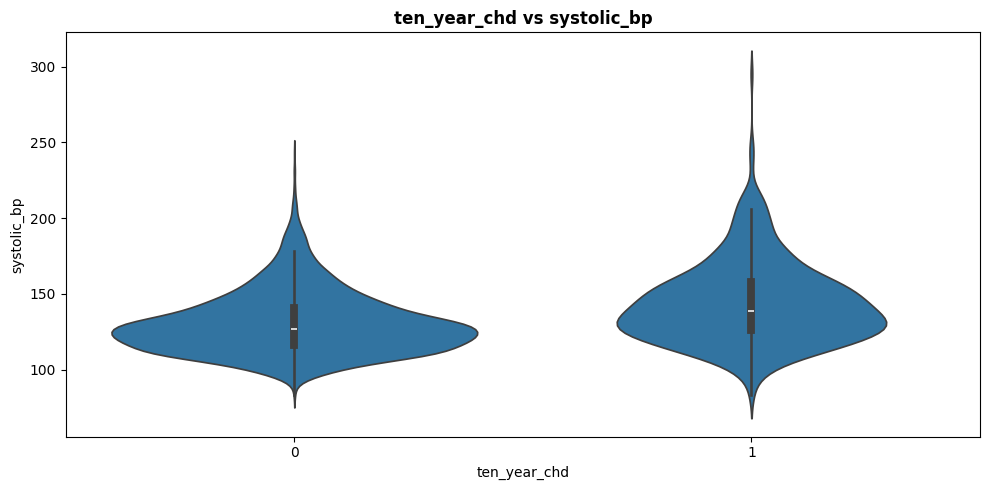

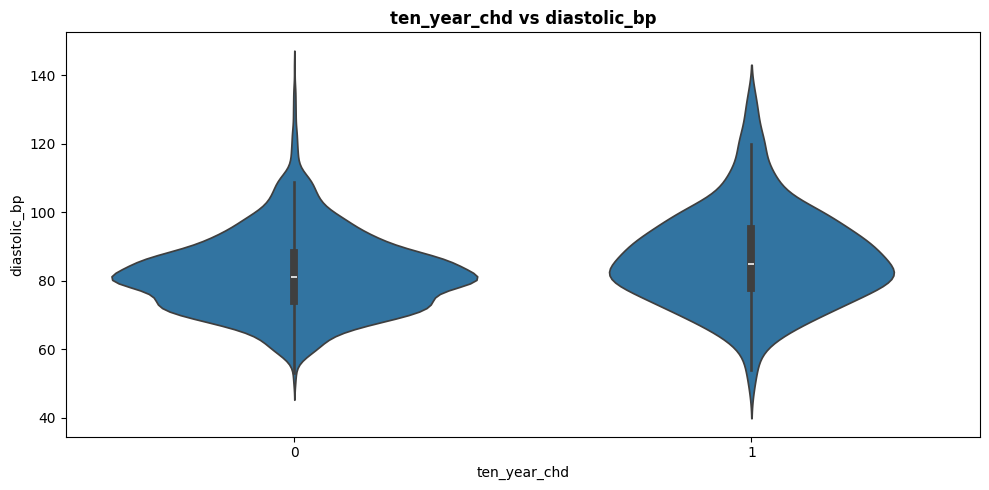

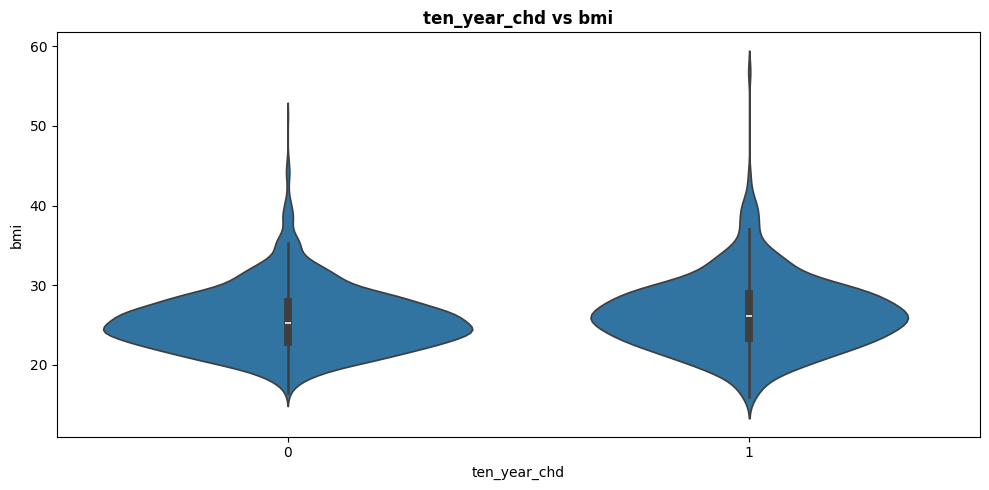

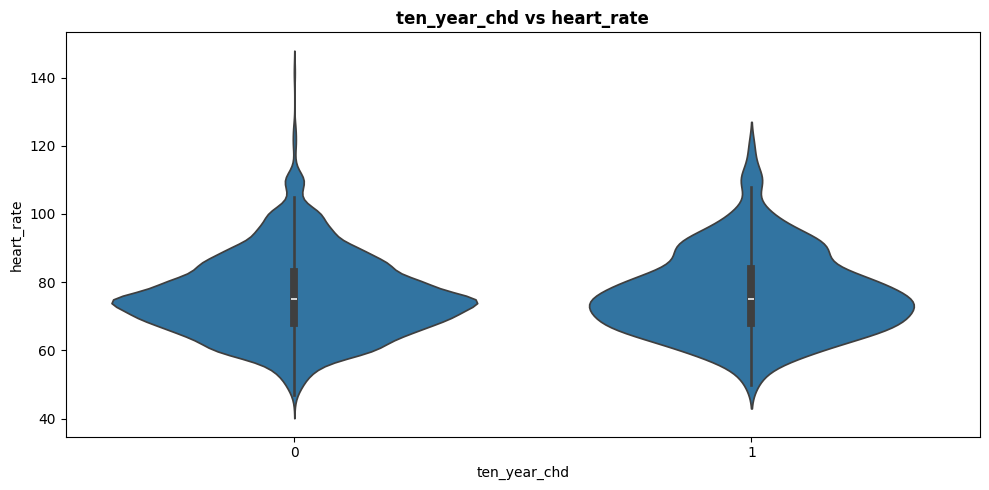

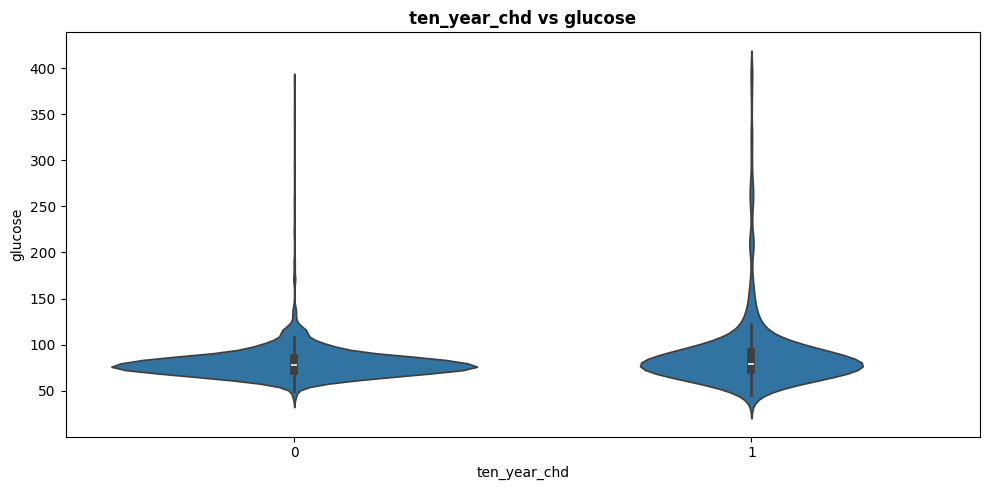

In [229]:
# Chart - 5 visualization code

# Relationship between the dependent variable and continuous independent variables
dependent_var = 'ten_year_chd'
for feature in continuous_feature:
  plt.figure(figsize=(10,5))
  sns.violinplot(x=dependent_var, y=feature, data=df)
  plt.ylabel(feature)
  plt.xlabel(dependent_var)
  plt.title(dependent_var+' vs '+feature, weight = 'bold')
  plt.tight_layout()
  plt.show()

##### 1. Why did you pick the specific chart?

Violin plots are useful for visualizing the distribution of a continuous variable across different categories of a discrete variable. In this case, they effectively show the distribution of each continuous feature for both groups: patients with and without a 10-year risk of CHD. This allows for a visual comparison of the distributions and helps identify potential differences between the two groups

##### 2. What is/are the insight(s) found from the chart?

The violin plots reveal some interesting insights about the relationship between continuous features and the risk of CHD:

* age: The distribution of age appears shifted towards older ages for patients with a 10-year risk of CHD (ten_year_chd = 1) compared to those without (ten_year_chd = 0). This suggests that older age is associated with a higher risk of CHD.
* cigs_per_day: The distribution of cigarettes per day is wider for patients with a 10-year risk of CHD, indicating a higher variability in the number of cigarettes smoked among this group. The peak of the distribution also appears slightly shifted towards higher values for the CHD risk group.
* total_cholesterol, systolic_bp, diastolic_bp, bmi, glucose: For these features, the violin plots show that the distributions for the group with a 10-year risk of CHD tend to be shifted towards higher values compared to the group without. This suggests that higher levels of cholesterol, blood pressure (systolic and diastolic), BMI, and glucose are associated with an increased risk of CHD.
* heart_rate: The heart rate distributions for both groups appear quite similar, suggesting that heart rate might not be as strong an indicator of 10-year CHD risk as some of the other continuous features in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from these violin plots are highly valuable for creating a positive business impact in healthcare. By visually identifying which continuous features have different distributions between the two CHD risk groups, we gain a better understanding of the factors that contribute to the risk of developing CHD.

These insights can directly inform the development of a predictive model by highlighting potentially important features. Features like age, total cholesterol, systolic blood pressure, diastolic blood pressure, BMI, and glucose show clear visual differences between the groups, suggesting they will be important predictors in the model.

There are no insights that necessarily lead to "negative growth" in a business sense. However, the observation that heart rate distributions are similar between the two groups might suggest that heart rate, in isolation, may not be a primary driver of 10-year CHD risk in this dataset. This doesn't represent negative growth, but rather helps prioritize which features might be more impactful for model building and subsequent interventions.

#### Chart - 6

In [230]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [231]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [232]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [233]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [234]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [235]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [236]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [237]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

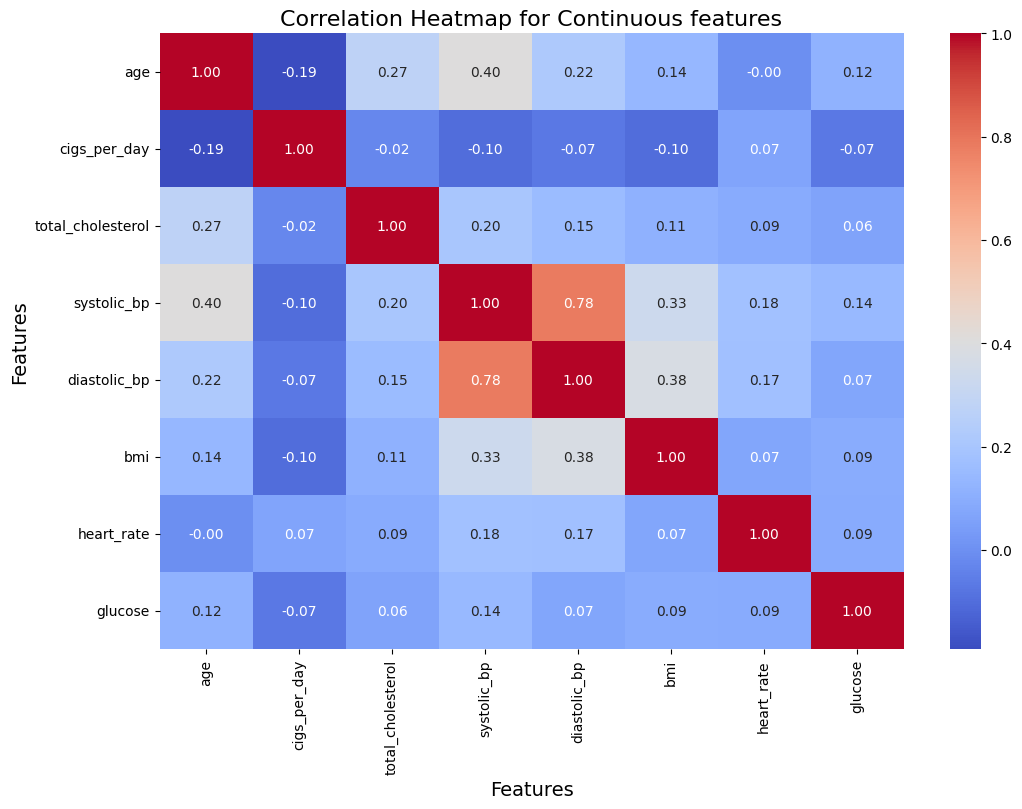

In [238]:
# Correlation Heatmap visualization code
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Get the correlation matrix
corr = df[continuous_feature].corr()

# Generate the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=False)

# Add a title and labels
plt.title("Correlation Heatmap for Continuous features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is an excellent choice for visualizing the pairwise correlations between continuous variables. It uses color intensity to represent the strength and direction of the correlation, making it easy to quickly identify which features are highly correlated with each other. This is crucial for understanding potential multicollinearity and for feature selection.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals the following insights:

* Strong Positive Correlations: There is a very strong positive correlation between systolic_bp and diastolic_bp (0.78). This is expected as these are both measures of blood pressure. There is also a moderate positive correlation between age and systolic_bp (0.40), and age and total_cholesterol (0.27). systolic_bp and bmi also show a moderate positive correlation (0.33).
* Weak Correlations: Many of the other continuous features show weak correlations with each other (values close to 0). For example, heart_rate has weak correlations with most other features.
* Relationships with cigs_per_day: cigs_per_day shows a weak negative correlation with age and bmi, and weak positive correlations with heart_rate.

#### Chart - 15 - Pair Plot

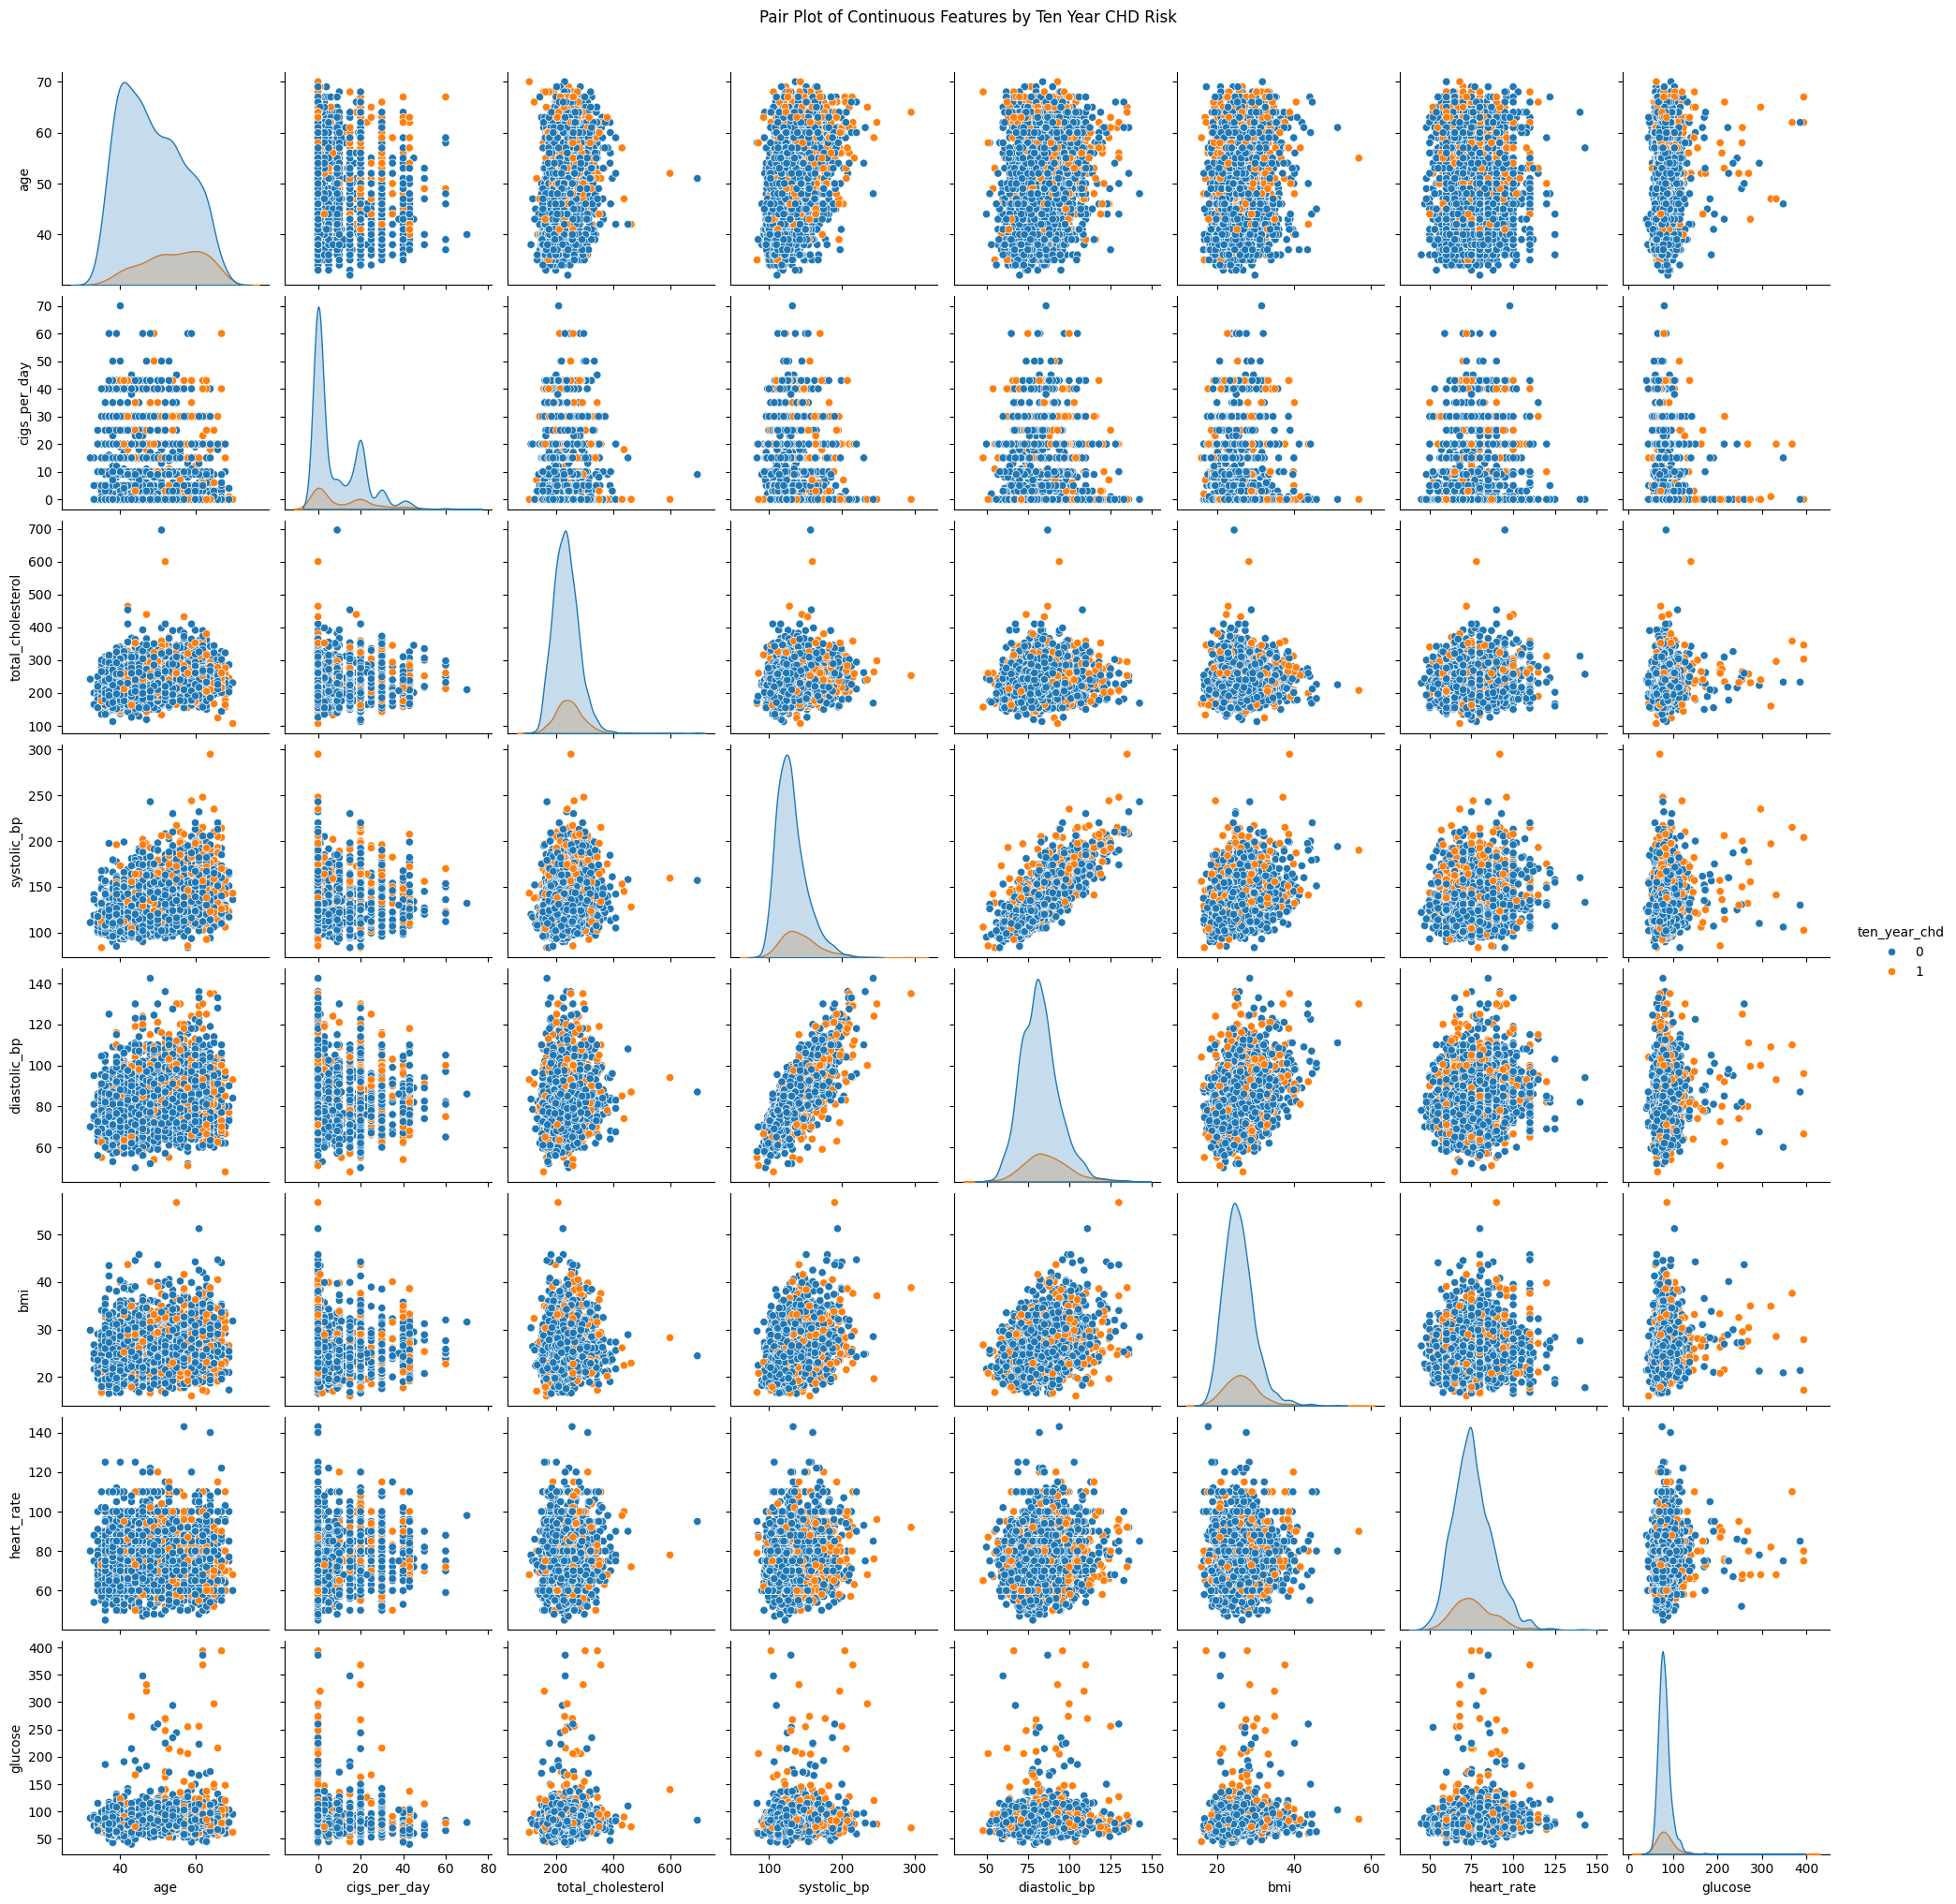

In [239]:
# Pair Plot visualization codes
sns.pairplot(df, vars=continuous_feature, hue='ten_year_chd', diag_kind='kde')

# Set the title
plt.suptitle('Pair Plot of Continuous Features by Ten Year CHD Risk', y=1.02) # Adjust title position

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a powerful visualization tool for exploring the relationships between multiple continuous variables and the distribution of each variable within different categories of a discrete variable. In this case, it allows us to see how pairs of continuous features are distributed for patients with and without a 10-year risk of CHD, as well as the individual distributions of these continuous features for each group.

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides several insights:
The pair plot of the selected continuous features provides several insights:

* Individual Feature Distributions: The diagonal plots show the distribution of each selected continuous feature for both CHD risk groups. We can observe differences in the shapes and ranges of these distributions, reinforcing the insights from the violin plots (e.g., age, total cholesterol, systolic blood pressure, BMI, and glucose tend to be higher in the group with CHD risk).
* Relationships Between Feature Pairs: The off-diagonal scatter plots show the relationship between each pair of selected continuous features, colored by the TenYearCHD outcome. This helps identify potential correlations or patterns between features that might be different for the two groups. For instance, we might observe a positive correlation between systolic blood pressure and age, and that patients with higher values for both are more likely to be in the CHD risk group.
* Separation of Classes: In some scatter plots, we might visually observe some separation between the orange (CHD risk) and blue (no CHD risk) points, indicating which feature combinations are more predictive of the outcome. However, the class imbalance is evident, with the blue points being much more numerous, making visual separation challenging in some cases

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1.  Age vs. CHD Risk

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀):** There is no significant difference in the distribution of age between people who develop CHD within 10 years and those who do not.
- **Alternative Hypothesis (H₁):** The distribution of age for people who develop CHD within 10 years is significantly higher than those who do not.

#### 2. Perform an appropriate statistical test.

In [240]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import mannwhitneyu

age_chd1 = df_w[df_w['ten_year_chd'] == 1]['age']
age_chd0 = df_w[df_w['ten_year_chd'] == 0]['age']

stat, p_value = mannwhitneyu(age_chd1, age_chd0, alternative='two-sided')

print(f"Hypothesis 1: Age vs CHD Risk")
print(f"Mann–Whitney U Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Null Hypothesis: Age differs significantly between CHD and non-CHD groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in Age.")


Hypothesis 1: Age vs CHD Risk
Mann–Whitney U Statistic: 998132.5000
P-Value: 0.0000
Reject Null Hypothesis: Age differs significantly between CHD and non-CHD groups.


##### Which statistical test have you done to obtain P-Value?

- **Test Used:** Mann–Whitney U Test (non-parametric)

##### Why did you choose the specific statistical test?

* Age is a continuous variable.

* ten_year_chd is a binary categorical variable (0/1).

* The distribution of age is unlikely to be perfectly normal, so a non-parametric test (Mann–Whitney) is more robust than a t-test.

### Hypothetical Statement - 2. Systolic Blood Pressure vs. CHD Risk

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀):** There is no significant difference in systolic blood pressure between CHD and non-CHD groups.
- **Alternative Hypothesis (H₁):** Systolic blood pressure is significantly higher in the CHD group.



#### 2. Perform an appropriate statistical test.

In [241]:
# Perform Statistical Test to obtain P-Value
sbp_chd1 = df_w[df_w['ten_year_chd'] == 1]['systolic_bp']
sbp_chd0 = df_w[df_w['ten_year_chd'] == 0]['systolic_bp']

stat, p_value = mannwhitneyu(sbp_chd1, sbp_chd0, alternative='two-sided')

print(f"\nHypothesis 2: Systolic BP vs CHD Risk")
print(f"Mann–Whitney U Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Null Hypothesis: Systolic BP differs significantly between groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in Systolic BP.")



Hypothesis 2: Systolic BP vs CHD Risk
Mann–Whitney U Statistic: 964573.5000
P-Value: 0.0000
Reject Null Hypothesis: Systolic BP differs significantly between groups.


##### Which statistical test have you done to obtain P-Value?

Mann–Whitney U test (non-parametric independent test).

##### Why did you choose the specific statistical test?

* Systolic BP is continuous.

* ten_year_chd is binary categorical.

* BP values are often skewed; Mann–Whitney avoids normality assumption.

### Hypothetical Statement - 3. Diabetes vs. CHD Risk

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀):** There is no association between diabetes status and CHD risk.

- **Alternative Hypothesis (H₁):** There is a significant association between diabetes status and CHD risk

#### 2. Perform an appropriate statistical test.

In [242]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_w['diabetes'], df_w['ten_year_chd'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nHypothesis 3: Diabetes vs CHD Risk")
print(f"Chi-square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.9f}")
if p_value < 0.05:
    print("Reject Null Hypothesis: Diabetes is associated with CHD risk.")
else:
    print("Fail to Reject Null Hypothesis: No significant association between Diabetes and CHD.")



Hypothesis 3: Diabetes vs CHD Risk
Chi-square Statistic: 34.6320
P-Value: 0.000000004
Reject Null Hypothesis: Diabetes is associated with CHD risk.


##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence.

##### Why did you choose the specific statistical test?

* Both diabetes and ten_year_chd are categorical variables.

* Chi-square is used to test association between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [243]:
# Handling Missing Values & Missing Value Imputation
from sklearn.impute import SimpleImputer


# Step 1: Create missing value flags
missing_cols = ['education', 'bp_meds', 'total_cholesterol', 'glucose']
for col in missing_cols:
    df[f"{col}_missing_flag"] = df[col].isnull().astype(int)

# Step 2: Categorical imputation (most frequent value)
cat_cols = ['education', 'bp_meds']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = pd.DataFrame(
    cat_imputer.fit_transform(df[cat_cols]),
    columns=cat_cols,
    index=df.index
).astype(int)

# Step 3: Numerical imputation (median value)
num_cols = ['cigs_per_day', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = pd.DataFrame(
    num_imputer.fit_transform(df[num_cols]),
    columns=num_cols,
    index=df.index
)

# Step 4: Check if any missing values remain
print("Remaining missing values:", df.isnull().sum().sum())



Remaining missing values: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

* Caterogical Imputation: I have used mode to preserves distribution, avoids artificial classes and clinically reasonable.
* Numerical Imputation. I have used median because median is robust to outliers, works well with skewed data and maintained central tendency withou pulled by extreme values.
* Missing Value Flags (Indicator Variables): For selected key variables (education, bp_meds, total_cholesterol, glucose), I created new binary columns (<col>_missing_flag) where: 1 → Original value was missing and 0 → Original value was present because in healthcare data, missingness can itself carry predictive information. It allows the model to learn patterns in missingness instead of assuming data is missing at random. For example, missing cholesterol data might indicate a patient hasn’t been tested recently, which could correlate with lower healthcare engagement and higher risk.



### 2. Handling Outliers

In [244]:
# Handling Outliers & Outlier treatments
import numpy as np
df[continuous_feature] = np.log1p(df[continuous_feature])


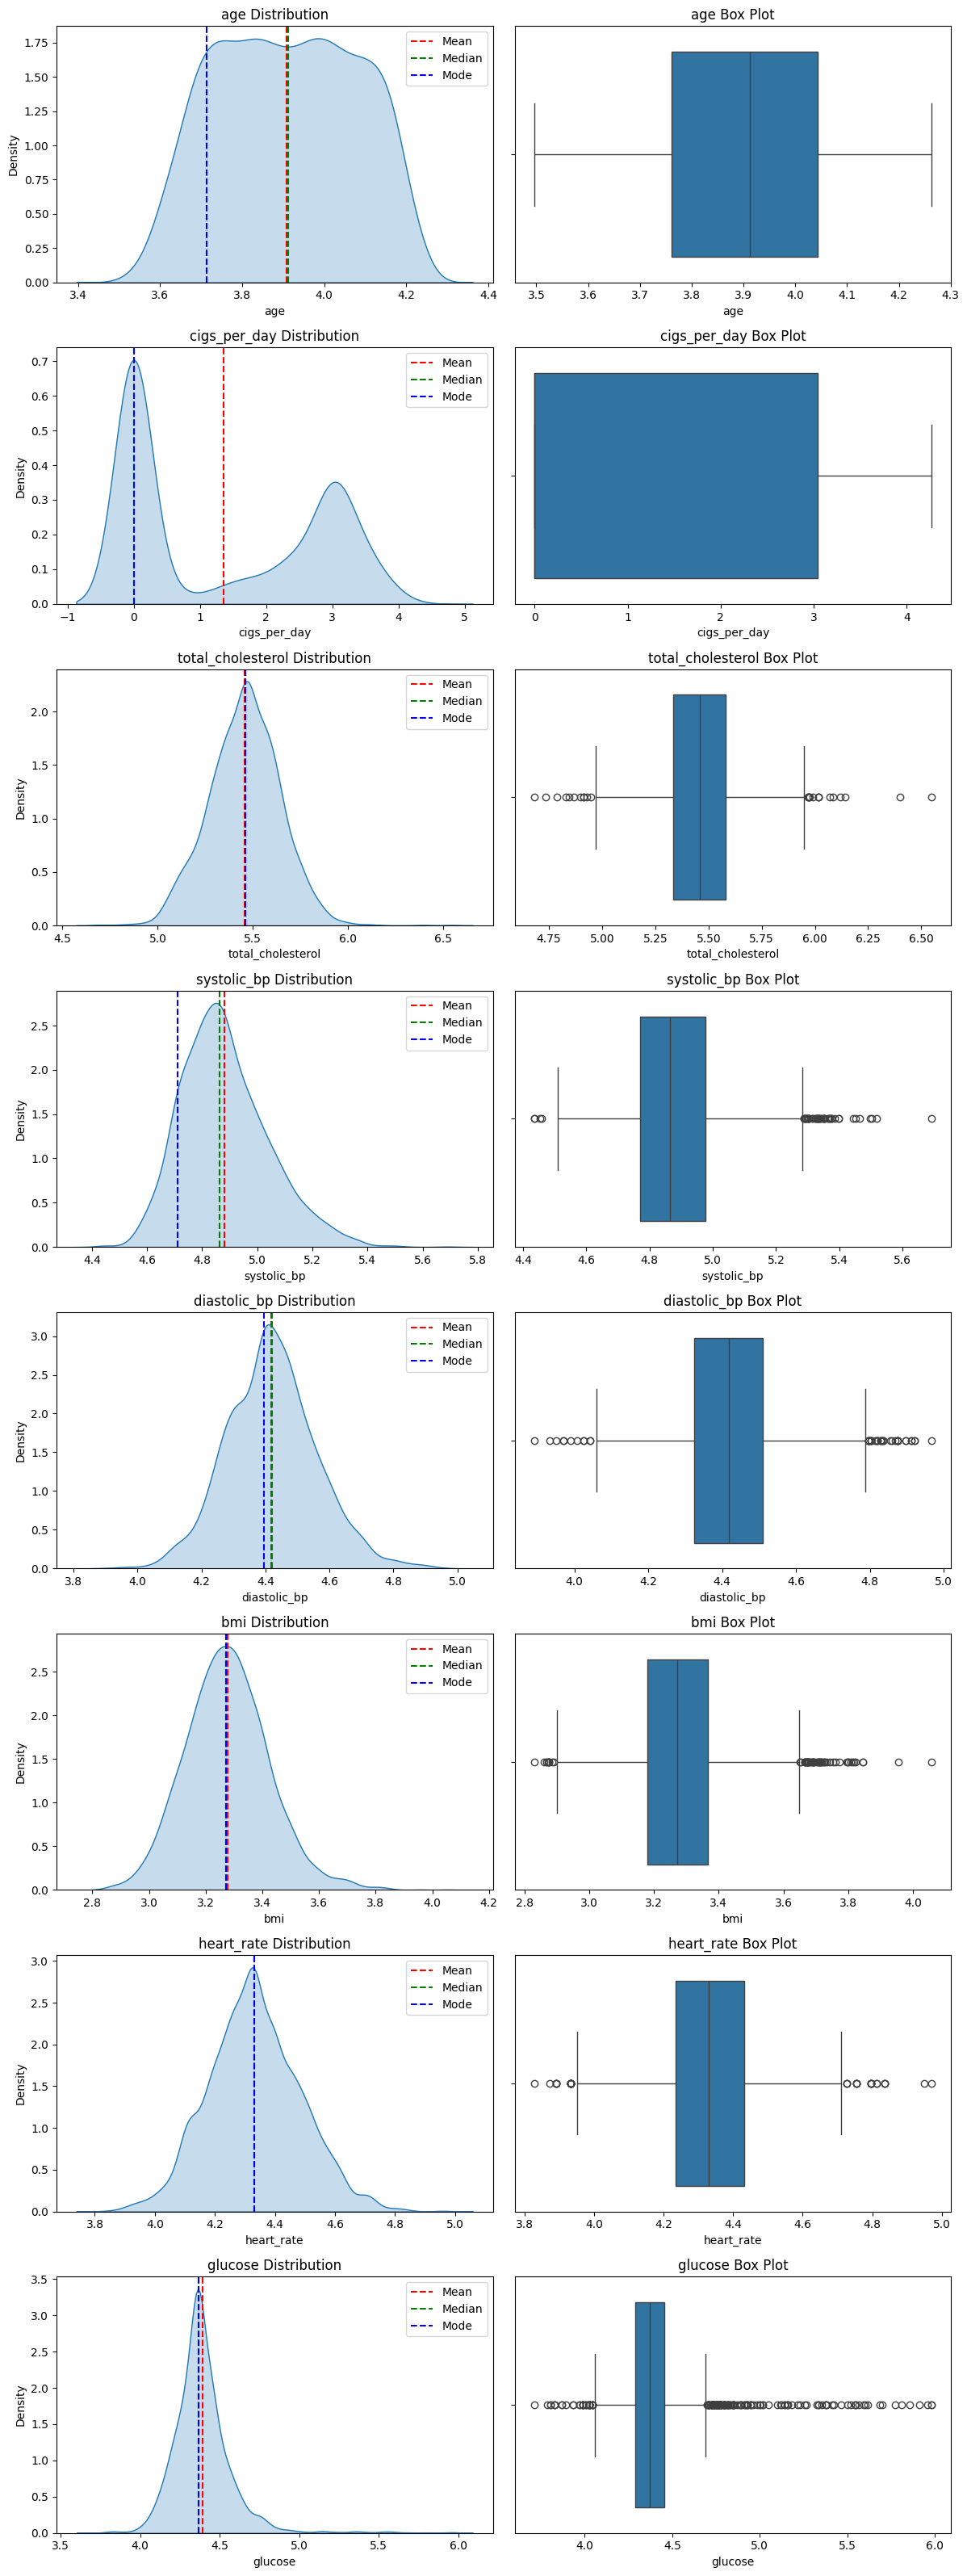

In [245]:
plot_distribution_and_boxplot()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used log transformation to handle extreme values because some extreme values of the thes features are important for predicting chd, so it's not benefital for the model to remove or impute tehm.

### 3. Categorical Encoding

In [246]:
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['is_smoking'] = df['is_smoking'].map({'NO': 0, 'YES': 1})


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used binary mapping(Manual Label Encoding for Binary Categorical Variables) because
* Data type: These features have only two possible categories.

- Efficiency: Simple and interpretable — avoids creating extra columns.

- Suitability for models: Most ML algorithms (especially tree-based models like RandomForest, XGBoost) can handle integer 0/1 encoding without introducing ordinal bias here because the mapping reflects a genuine binary distinctio

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [247]:
# Expand Contraction

#### 2. Lower Casing

In [248]:
# Lower Casing

#### 3. Removing Punctuations

In [249]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [250]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [251]:
# Remove Stopwords

In [252]:
# Remove White spaces

#### 6. Rephrase Text

In [253]:
# Rephrase Text

#### 7. Tokenization

In [254]:
# Tokenization

#### 8. Text Normalization

In [255]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [256]:
# POS Taging

#### 10. Text Vectorization

In [257]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [258]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [259]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [260]:
# Transform Your data

### 6. Data Scaling

In [261]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [262]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [263]:
# Scaling your data
X= df.drop('ten_year_chd',axis=1)
y= df[['ten_year_chd']]
print(X.shape)
print(y.shape)

(3390, 19)
(3390, 1)


In [264]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

To prevent overfitting and improve model generalization performance, we allocated 80% of the data to the training set and 20% to the testing set. The train_test_split function from the scikit-learn library was used for this purpose, as it's a common approach for training and testing the model on different data samples.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

From the EDA: Ten Year CHD (%) chart shows that the dataset is imbalanced, with a much larger proportion of patients not having a 10-year risk of CHD (84.9%) compared to those who do (15.1%).

In [265]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [266]:
print(f'Original Class distribution of Y_train: {y_train.value_counts()}\n')
print(f'Resampled Class Distribution of Y_train: {y_res.value_counts()}')

Original Class distribution of Y_train: ten_year_chd
0               2298
1                414
Name: count, dtype: int64

Resampled Class Distribution of Y_train: ten_year_chd
0               2298
1               2298
Name: count, dtype: int64


In [267]:
# Replace the original training data with the resampled balanced data
X_train = X_res
y_train = y_res

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used the SMOTE (Synthetic Minority Over-sampling Technique) method to handle the class imbalance in the dataset. SMOTE works by creating synthetic samples for the minority class rather than simply duplicating existing instances, which helps the model learn decision boundaries more effectively. I chose SMOTE because it reduces the risk of overfitting compared to random oversampling and ensures that the training data is balanced, thereby improving recall and overall performance on the minority class. Since class imbalance can bias the model towards the majority class, balancing the dataset was necessary to achieve fair and accurate predictions.

## ***7. ML Model Implementation***

### ML Model - 1

In [268]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(X_train.columns):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=X_train.columns)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [269]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

In [270]:
# ML Model - 1 Implementation

# Fit the Algorithm
lr_model = LogisticRegression()


Train ROC AUC: 0.6795039164490863
Test ROC AUC: 0.6750181876253172


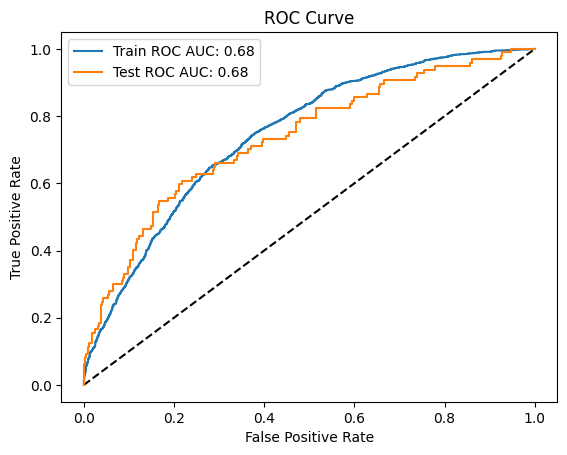


Confusion Matrix:


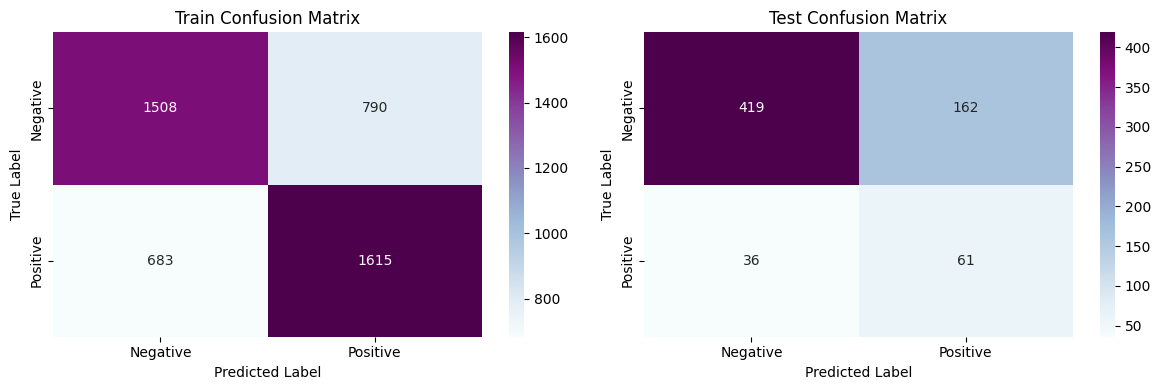


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.68827  | 0.656223 |   0.671865 | 2298        |
| 1            |    0.671518 | 0.702785 |   0.686796 | 2298        |
| accuracy     |    0.679504 | 0.679504 |   0.679504 |    0.679504 |
| macro avg    |    0.679894 | 0.679504 |   0.67933  | 4596        |
| weighted avg |    0.679894 | 0.679504 |   0.67933  | 4596        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.920879 | 0.72117  |   0.80888  | 581        |
| 1            |    0.273543 | 0.628866 |   0.38125  |  97        |
| accuracy     |    0.707965 | 0.707965 |   0.707965 |   0.707965 |
| macro avg    |    0.597211 | 0.675018 |   0.595065 | 678        |
| weighted avg |    0.828266 | 0.707965 |   0.7477

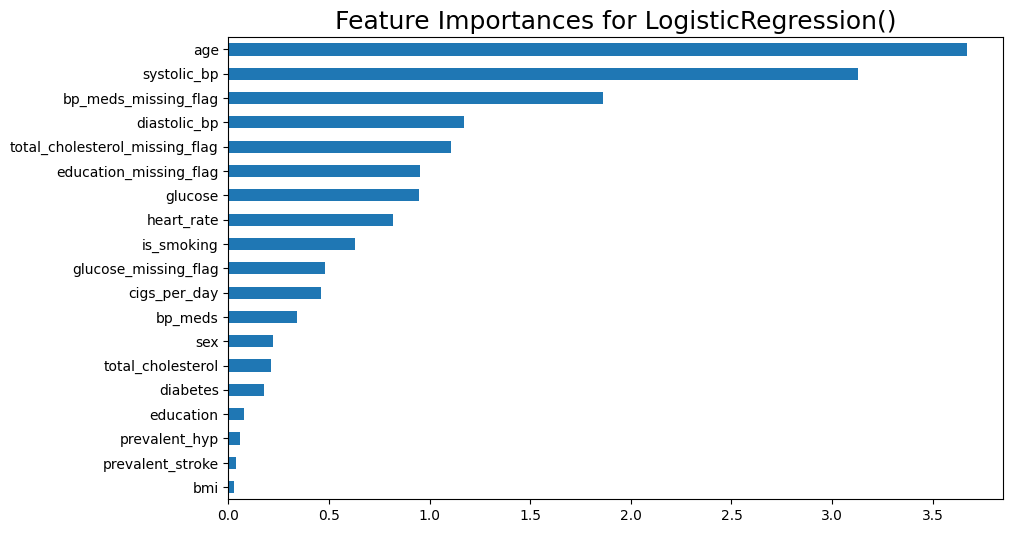

In [271]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***